In [20]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [24]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [25]:
df[df.TotalCharges!= ' '].shape

(7032, 20)

In [26]:
df1= df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [27]:
df1.TotalCharges = pd.to_numeric( df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


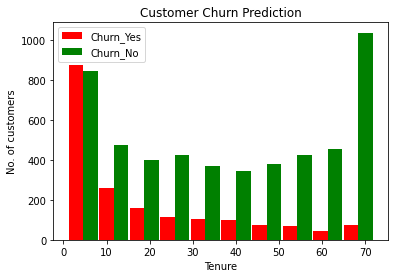

In [30]:

tenure_no = df1[df1.Churn == 'No'].tenure
tenure_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_yes,tenure_no],rwidth=0.95,color=['red','green'],label=['Churn_Yes','Churn_No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


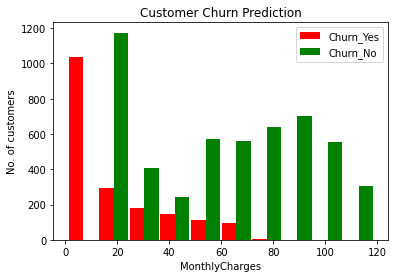

In [31]:

tenure_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('MonthlyCharges')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_yes,tenure_no],rwidth=0.95,color=['red','green'],label=['Churn_Yes','Churn_No'])
plt.legend()

In [32]:
def print_unique_col(df):
  for column in df:
    if df[column].dtypes== 'object' :
      print(f'{column}: {df[column].unique()}')



In [50]:
print_unique_col(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [34]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [36]:
binary_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup'
,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in binary_col:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [38]:
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [40]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [41]:
col_scale =['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df2[col_scale]=scaler.fit_transform(df2[col_scale])

In [42]:
for col in df2:
  print (f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [51]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test =train_test_split(x,y,test_size=0.2,random_state=54)

In [53]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_Train,Y_Train, epochs=100)


Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.5163 - accuracy: 0.7376
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.7986
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4181 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8117
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4021 - accura

In [55]:
model.evaluate(X_Test,Y_Test)

44/44 [==============================] - 1s 5ms/step - loss: 0.5031 - accuracy: 0.7697


[0.5031105875968933, 0.7697228193283081]

In [56]:
yp = model.predict(X_Test)
yp[:5]

array([[0.3331052 ],
       [0.4958854 ],
       [0.02783552],
       [0.77183056],
       [0.26491147]], dtype=float32)

In [57]:
Y_Pred= []
for element in yp:
  if element >0.5:
    Y_Pred.append(1)
  else:
    Y_Pred.append(0)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

print (classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.63      0.49      0.55       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

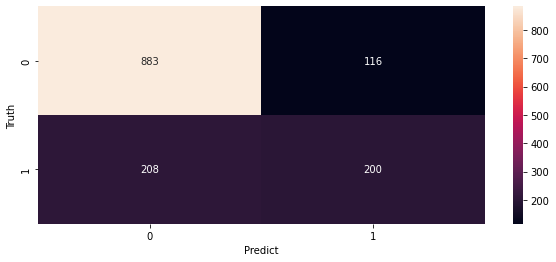

In [60]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_Test,predictions=Y_Pred)

plt.figure(figsize=(10,4))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1,1,10,20,100],
            'kernel': ['rbf','linear', 'poly']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decsion_tree' : {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy'],
            'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100]
        }
    },
    'naive_bayes_multi':{
        'model':  MultinomialNB(),
        'params':{        
        }
    },
    'naive_bayes_gaussian' : {
        'model': GaussianNB(),
        'params': {
        'var_smoothing': np.logspace(0,-9,num=100)
        }

    }
    
}
    


In [65]:
scores = []

for model_name, mp in model_params.items():
    clf_a =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_a.fit(X_Train, Y_Train)
    scores.append({
        'model': model_name,
        'best_score': clf_a.best_score_,
        'best_params': clf_a.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.803556,"{'C': 1, 'kernel': 'linear'}"
1,logistic_regression,0.806044,{'C': 5}
2,decsion_tree,0.792000,"{'criterion': 'entropy', 'max_depth': 5}"
3,random_forest,0.790933,{'n_estimators': 100}
4,naive_bayes_multi,0.782933,{}
5,naive_bayes_gaussian,0.749156,{'var_smoothing': 1.0}
